In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
pd.options.display.min_rows = 11

%config InlineBackend.figure_format="retina"  # enable retina display 

This exercise demonstrates tools for handling and analyzing stock market data with Python. 

Before we analyze stock data, we need to get it into some workable format. Stock data can be obtained from Yahoo! Finance, Google Finance, or a number of other sources. We can use data acess interfaces provided by pandas' [datareader sub package](https://pandas-datareader.readthedocs.io/), called `pandas-datareader`, to create a `DataFrame` from various Internet data sources easily.

<img src="https://raw.githubusercontent.com/justinjiajia/img/master/python/pandas_datareader.png" width=900/>

1. If you want to work on this file from your own computer, because `pandas_datareader` is not installed in the Anaconda default stack, you have to install it from within Anaconda Navigator first. There are 2 ways to install it:

   - 1) Click to choose the base(root) environment, change the selection of packages displayed in the right pane by clicking the drop-down box above it and selecting **All**, and type **pandas** in the search box. Once you locate the `pandas-datareader` package in the search result, tick the checkbox before it, and then click on the <kbd>Apply</kbd> button at the bottem right corner to start the installation. 
   
   - 2) <font color='red'>*(Recommended)*</font> Click on the right-triangle button on the base(root) tab, and choose **Open Terminal** from the displayed menu. Run `pip install pandas-datareader` in the opened command prompt.

   It'll take a couple of seconds to finish the installation.


2. <font color='red'>*(Recommended)*</font> If you are going to work on it from Google Colab, then you need to do nothing related to the package setup, because Google Colab's default environment has this package installed already. 

In [54]:
import pandas_datareader
from pandas_datareader import data as dr
from datetime import date, datetime

In [5]:
pandas_datareader.__version__   # if not, run 'pip install --upgrade pandas-datareader' to upgrade it

'0.10.0'

In [34]:
apple = dr.DataReader('AAPL', 'yahoo', start='1/2/2021', end='10/31/2021')
amazon = dr.DataReader('AMZN', 'yahoo', start='1/2/2021', end='10/31/2021')
google = dr.DataReader('GOOG', 'yahoo', start='1/2/2021', end='10/31/2021')

In [35]:
google

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,1760.650024,1707.849976,1757.540039,1728.239990,1901900,1728.239990
2021-01-05,1747.670044,1718.015015,1725.000000,1740.920044,1145300,1740.920044
2021-01-06,1748.000000,1699.000000,1702.630005,1735.290039,2602100,1735.290039
2021-01-07,1788.400024,1737.050049,1740.060059,1787.250000,2265000,1787.250000
2021-01-08,1809.839966,1773.535034,1787.979980,1807.209961,2050600,1807.209961
...,...,...,...,...,...,...
2021-10-25,2784.115967,2734.969971,2776.209961,2775.459961,1054100,2775.459961
2021-10-26,2816.790039,2780.110107,2812.120117,2793.439941,1412900,2793.439941
2021-10-27,2982.360107,2798.050049,2798.050049,2928.550049,2592500,2928.550049


Let's briefly discuss the meanings of these different prices. Open is the price of the stock at the beginning of the trading day, high is the highest price of the stock on that trading day, low the lowest price of the stock on that trading day, and close the price of the stock at closing time. Volume indicates how many stocks were traded. Adjusted close is the closing price adjusted for dividend payments, splits, and other corporate actions which directly influence overall return.

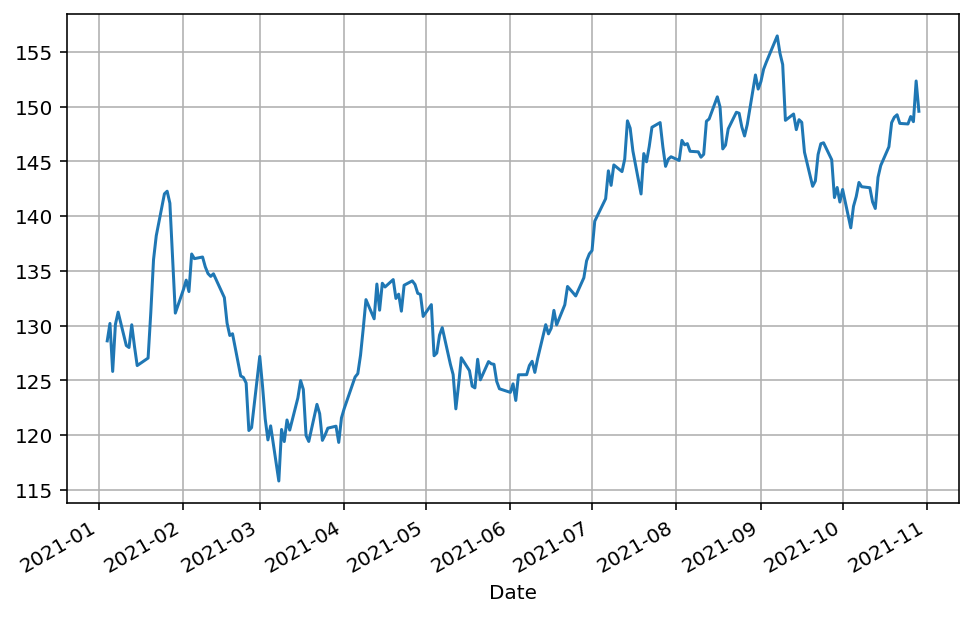

In [13]:
apple["Adj Close"].plot(grid = True, figsize=(8, 5))
plt.show()

We may want to compare stocks, compare them to the market, or look at other securities. So we often want to plot multiple financial instruments together. To do so, we need to first combine adjusted closing price data of different stocks into one `DataFrame`. 

1. Create a `DataFrame` containing the adjusted closing prices for all 3 stocks. Name it `stock`. It should look like as follows:


<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>AAPL</th>
      <th>AMZN</th>
      <th>GOOG</th>
    </tr>
    <tr>
      <th>Date</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2021-01-04</th>
      <td>128.617096</td>
      <td>3186.629883</td>
      <td>1728.239990</td>
    </tr>
    <tr>
      <th>2021-01-05</th>
      <td>130.207291</td>
      <td>3218.510010</td>
      <td>1740.920044</td>
    </tr>
    <tr>
      <th>2021-01-06</th>
      <td>125.824326</td>
      <td>3138.379883</td>
      <td>1735.290039</td>
    </tr>
    <tr>
      <th>2021-01-07</th>
      <td>130.117844</td>
      <td>3162.159912</td>
      <td>1787.250000</td>
    </tr>
    <tr>
      <th>2021-01-08</th>
      <td>131.240906</td>
      <td>3182.699951</td>
      <td>1807.209961</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>2021-10-25</th>
      <td>148.423386</td>
      <td>3320.370117</td>
      <td>2775.459961</td>
    </tr>
    <tr>
      <th>2021-10-26</th>
      <td>149.102402</td>
      <td>3376.070068</td>
      <td>2793.439941</td>
    </tr>
    <tr>
      <th>2021-10-27</th>
      <td>148.633087</td>
      <td>3392.489990</td>
      <td>2928.550049</td>
    </tr>
    <tr>
      <th>2021-10-28</th>
      <td>152.347656</td>
      <td>3446.570068</td>
      <td>2922.580078</td>
    </tr>
    <tr>
      <th>2021-10-29</th>
      <td>149.581696</td>
      <td>3372.429932</td>
      <td>2965.409912</td>
    </tr>
  </tbody>
</table>
<p>209 rows × 3 columns</p>
</div>

In [ ]:
# Write your code here




Now we can plot their adjusted closing prices together:

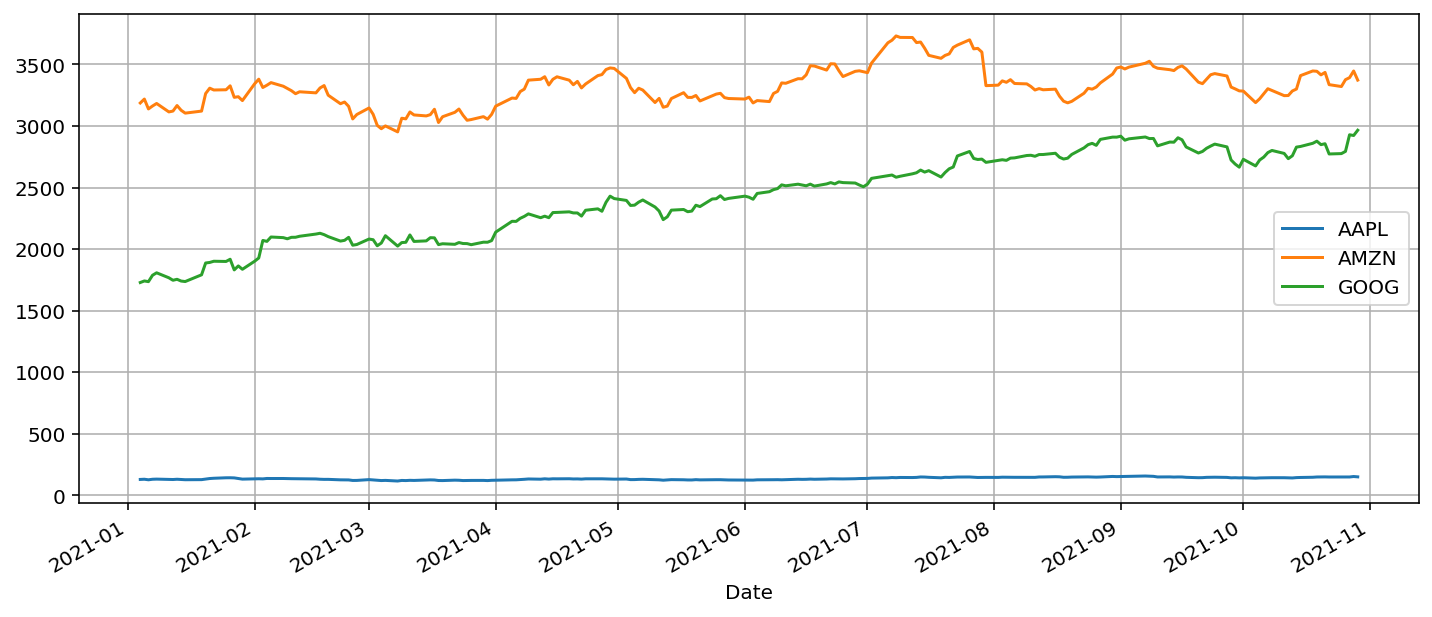

In [57]:
stock.plot(grid = True, figsize=(12, 5))
plt.show()

As we can see, Google's and Amazon's stocks are much more expensive than Apple's, and this difference makes Apple's stock appear much less volatile than it truly is (that is, its price appears to not deviate much).

One solution would be to use two different scales when plotting the data; one scale will be used by Google and Amazon stocks, and the other by Apple.



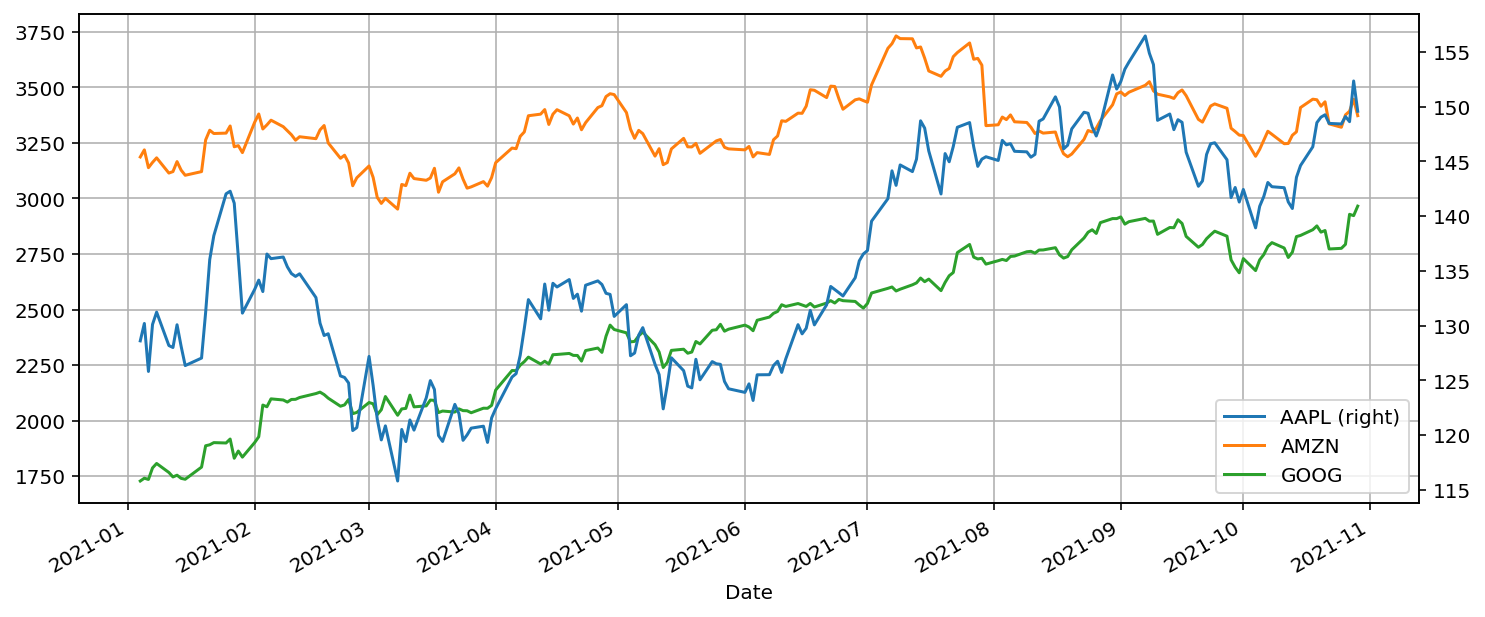

In [16]:
stock.plot(secondary_y = ["AAPL"], grid = True, figsize=(12, 5))
plt.show()

When trading, we are actually more concerned about the relative change of an asset rather than its absolute price. Therefore, a better solution would be to plot the stock's returns. If we consider the stock's return since the beginning of the period of interest, we can plot:

$$
return_{t, 1}=\frac{price_t}{price_1}
$$

So we need to tranform the adjusted closing price data in `stocks` to calculate the stock returns.

2. Create a `DataFrame` containing the returns of all 3 stocks since the beginning of the period (01/02/2021). Name it `stock_return`. It should look like as follows:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>AAPL</th>
      <th>AMZN</th>
      <th>GOOG</th>
    </tr>
    <tr>
      <th>Date</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2021-01-04</th>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
    </tr>
    <tr>
      <th>2021-01-05</th>
      <td>1.012364</td>
      <td>1.010004</td>
      <td>1.007337</td>
    </tr>
    <tr>
      <th>2021-01-06</th>
      <td>0.978286</td>
      <td>0.984859</td>
      <td>1.004079</td>
    </tr>
    <tr>
      <th>2021-01-07</th>
      <td>1.011668</td>
      <td>0.992321</td>
      <td>1.034145</td>
    </tr>
    <tr>
      <th>2021-01-08</th>
      <td>1.020400</td>
      <td>0.998767</td>
      <td>1.045694</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>2021-10-25</th>
      <td>1.153994</td>
      <td>1.041969</td>
      <td>1.605946</td>
    </tr>
    <tr>
      <th>2021-10-26</th>
      <td>1.159273</td>
      <td>1.059448</td>
      <td>1.616350</td>
    </tr>
    <tr>
      <th>2021-10-27</th>
      <td>1.155625</td>
      <td>1.064601</td>
      <td>1.694527</td>
    </tr>
    <tr>
      <th>2021-10-28</th>
      <td>1.184505</td>
      <td>1.081572</td>
      <td>1.691073</td>
    </tr>
    <tr>
      <th>2021-10-29</th>
      <td>1.163000</td>
      <td>1.058306</td>
      <td>1.715855</td>
    </tr>
  </tbody>
</table>
<p>209 rows × 3 columns</p>
</div>

In [ ]:
# Write your code here



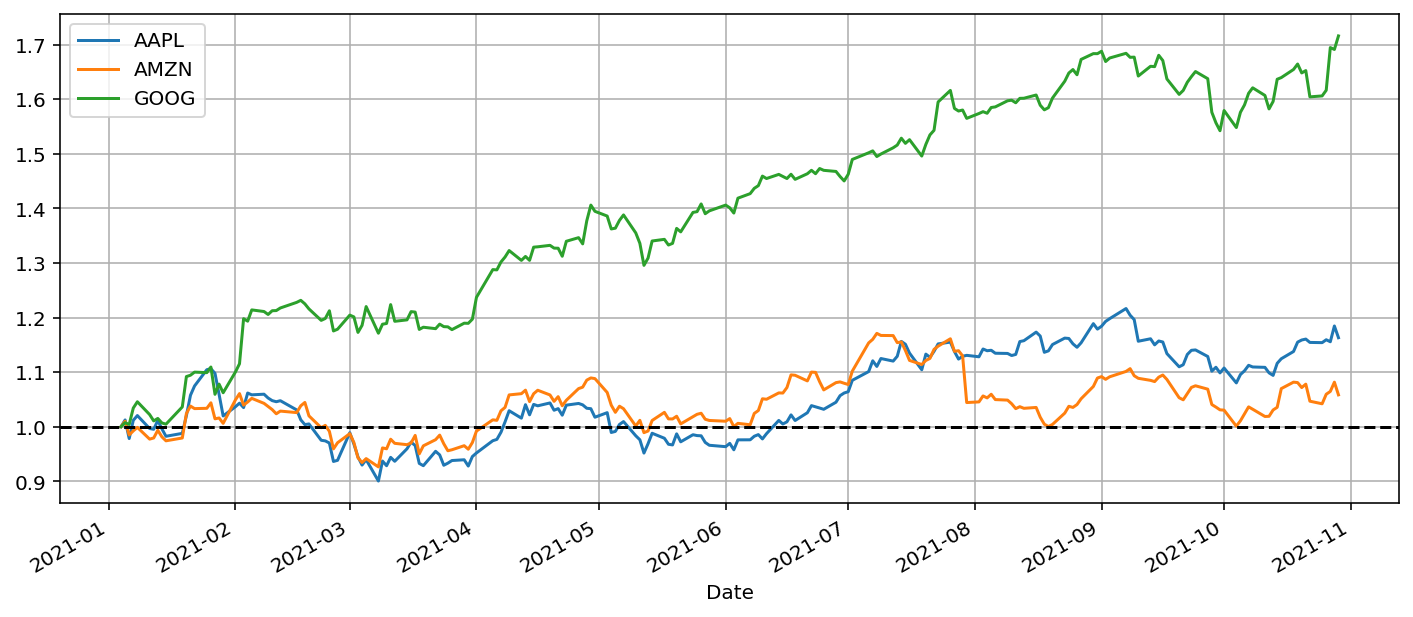

In [18]:
stock_return.plot(grid = True, figsize=(12, 5)).axhline(y = 1, color = "k", ls="dashed")
plt.show()

We often want to compare the performance of stocks to the performance of the overall market. [SPY](https://finance.yahoo.com/quote/SPY/), which is the ticker symbol for the SPDR S&P 500 exchange-traded mutual fund (ETF), is a fund that attempts only to imitate the composition of the [S&P 500 stock index](https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC), and thus represents the "value in the market".

In [40]:
spdr = dr.DataReader('SPY', 'yahoo', start='1/2/2021', end='10/31/2021'); spdr

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,375.450012,364.820007,375.309998,368.790009,110210800.0,365.217377
2021-01-05,372.500000,368.049988,368.100006,371.329987,66426200.0,367.732758
2021-01-06,376.980011,369.119995,369.709991,373.549988,107997700.0,369.931244
2021-01-07,379.899994,375.910004,376.100006,379.100006,68766800.0,375.427490
2021-01-08,381.489990,377.100006,380.589996,381.260010,71677200.0,377.566559
...,...,...,...,...,...,...
2021-10-25,455.899994,452.390015,454.279999,455.549988,45214500.0,455.549988
2021-10-26,458.489990,455.559998,457.200012,455.959991,56075100.0,455.959991
2021-10-27,457.160004,453.859985,456.450012,453.940002,72438000.0,453.940002


3. Add a column for the adjusted closing price of ETF to the `stock` `DataFrame`.  It should look like as follows:  

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>AAPL</th>
      <th>AMZN</th>
      <th>GOOG</th>
      <th>SPY</th>
    </tr>
    <tr>
      <th>Date</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2021-01-04</th>
      <td>128.617111</td>
      <td>3186.629883</td>
      <td>1728.239990</td>
      <td>365.217407</td>
    </tr>
    <tr>
      <th>2021-01-05</th>
      <td>130.207291</td>
      <td>3218.510010</td>
      <td>1740.920044</td>
      <td>367.732758</td>
    </tr>
    <tr>
      <th>2021-01-06</th>
      <td>125.824326</td>
      <td>3138.379883</td>
      <td>1735.290039</td>
      <td>369.931213</td>
    </tr>
    <tr>
      <th>2021-01-07</th>
      <td>130.117859</td>
      <td>3162.159912</td>
      <td>1787.250000</td>
      <td>375.427521</td>
    </tr>
    <tr>
      <th>2021-01-08</th>
      <td>131.240921</td>
      <td>3182.699951</td>
      <td>1807.209961</td>
      <td>377.566589</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>2021-10-25</th>
      <td>148.423386</td>
      <td>3320.370117</td>
      <td>2775.459961</td>
      <td>455.549988</td>
    </tr>
    <tr>
      <th>2021-10-26</th>
      <td>149.102402</td>
      <td>3376.070068</td>
      <td>2793.439941</td>
      <td>455.959991</td>
    </tr>
    <tr>
      <th>2021-10-27</th>
      <td>148.633087</td>
      <td>3392.489990</td>
      <td>2928.550049</td>
      <td>453.940002</td>
    </tr>
    <tr>
      <th>2021-10-28</th>
      <td>152.347656</td>
      <td>3446.570068</td>
      <td>2922.580078</td>
      <td>458.320007</td>
    </tr>
    <tr>
      <th>2021-10-29</th>
      <td>149.581696</td>
      <td>3372.429932</td>
      <td>2965.409912</td>
      <td>459.250000</td>
    </tr>
  </tbody>
</table>
<p>209 rows × 4 columns</p>
</div>

In [ ]:
# Write your code here



4. Create a DataFrame containing the returns of the 3 stocks and the ETF since the beginning of the period (01/02/2021). Reassign the name  `stock_return` to it.

In [ ]:
# Write your code here



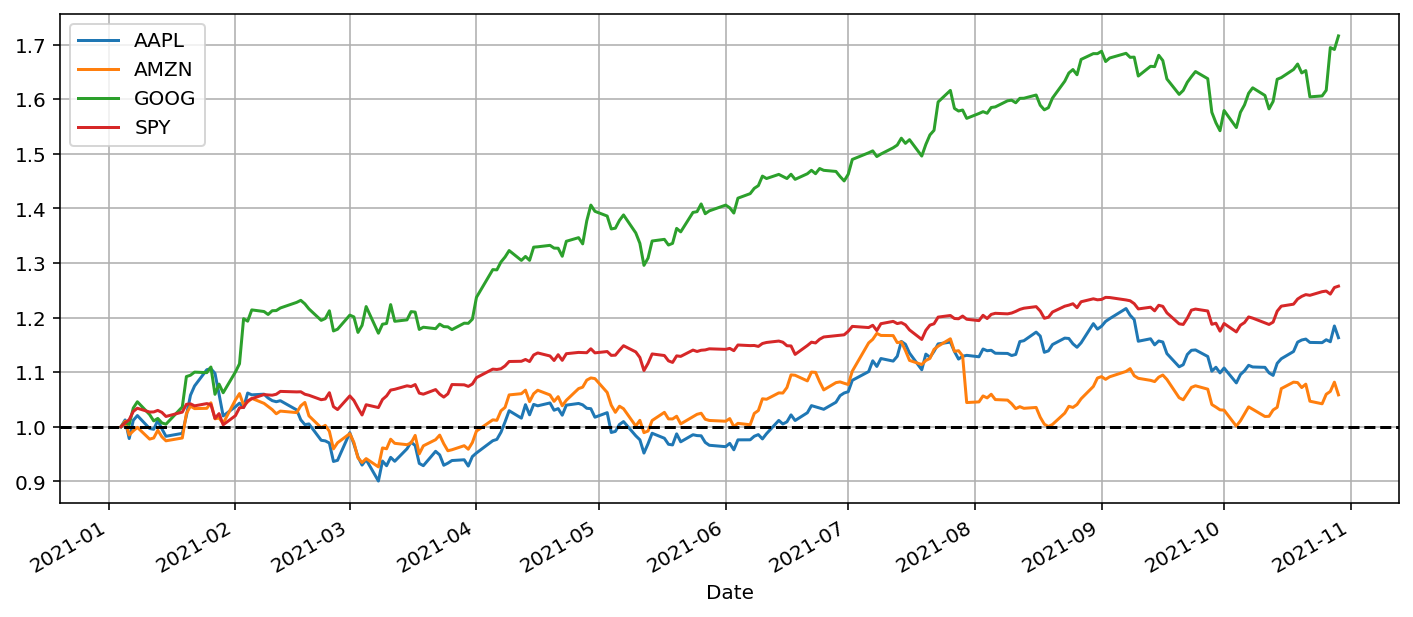

In [60]:
# plot the resulting DataFrame creates the following figure

stock_return.plot(grid = True, figsize=(12, 5)).axhline(y=1, color = "k", ls="dashed")
plt.show()

5. Calculate the monthly stock return for the 3 stocks and the ETF. Organize the output in the following format that is convenient for stock-by-stock comparison.
<font color='red'>Hint: create an auxiliary column for month in the `stock` DataFrame. Use the month column as the key column to define the needed group-wise operation.</div> 



<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Symbol</th>
      <th>AAPL</th>
      <th>AMZN</th>
      <th>GOOG</th>
      <th>SPY</th>
    </tr>
    <tr>
      <th>Month</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>0.019705</td>
      <td>0.006141</td>
      <td>0.062202</td>
      <td>0.003471</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-0.094668</td>
      <td>-0.074771</td>
      <td>0.071270</td>
      <td>0.010977</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-0.044135</td>
      <td>-0.016547</td>
      <td>-0.006188</td>
      <td>0.020658</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.068781</td>
      <td>0.096938</td>
      <td>0.127410</td>
      <td>0.041661</td>
    </tr>
    <tr>
      <th>5</th>
      <td>-0.058234</td>
      <td>-0.048256</td>
      <td>0.006843</td>
      <td>0.004400</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.102028</td>
      <td>0.068821</td>
      <td>0.031488</td>
      <td>0.023329</td>
    </tr>
    <tr>
      <th>7</th>
      <td>0.062577</td>
      <td>-0.030696</td>
      <td>0.070053</td>
      <td>0.018772</td>
    </tr>
    <tr>
      <th>8</th>
      <td>0.044925</td>
      <td>0.041816</td>
      <td>0.069656</td>
      <td>0.031925</td>
    </tr>
    <tr>
      <th>9</th>
      <td>-0.072192</td>
      <td>-0.055752</td>
      <td>-0.086234</td>
      <td>-0.047112</td>
    </tr>
    <tr>
      <th>10</th>
      <td>0.050123</td>
      <td>0.027159</td>
      <td>0.086529</td>
      <td>0.057595</td>
    </tr>
  </tbody>
</table>
</div>

To calculate a monthly stock return, we need to compare the adjusted closing price at the end of a month with the adjusted closing price at the start of the month. The formula for return begins by dividing the last day's price by the first day's price in a month. The number 1 is then subtracted from this result.

In [ ]:
# Write your code here


